In [1]:
from IPython.core.display import display

import matplotlib as mpl
mpl.rc('text', usetex = True)
mpl.rc('font', size = 14)

In [2]:
from MoneyGridModel import MoneyGridModel

In [3]:
# store data from num_runs
num_runs = 100

# each run has num_steps steps
num_steps = 100

# each model has num_agents agents
num_agents = 500

# size of the grid
grid_width = 50
grid_height = 50

# data from all simulations
wealth_data = []
agent_counts = np.zeros((grid_width, grid_height))

In [4]:
for _ in range(num_runs):
    # create a model
    model = MoneyGridModel(num_agents, grid_width, grid_height)

    # execute num_steps steps
    for _ in range(num_steps):
        model.step()
        
    for a in model.schedule.agents:
        wealth_data.append(a.wealth)

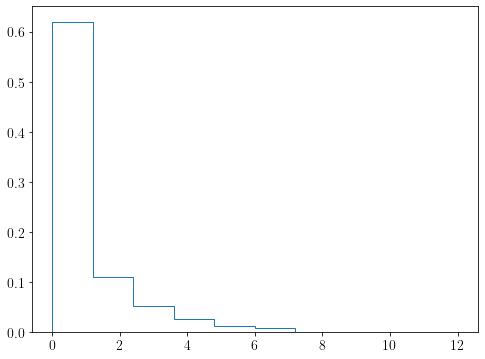

In [5]:
fig = mpl.figure.Figure(figsize=(8,6))

axs = fig.add_subplot()

axs.hist(wealth_data, density=True, histtype='step')

display(fig)

In [6]:
for cell in model.grid.coord_iter():
    cell_content, x, y = cell
    agent_counts[x][y] = len(cell_content)    

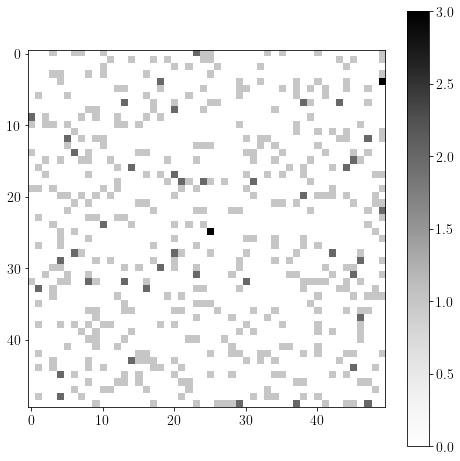

In [7]:
fig = mpl.figure.Figure(figsize=(8,8))

axs = fig.add_subplot()

axs.imshow(agent_counts, interpolation='none', cmap=mpl.cm.Greys)

norm = mpl.cm.colors.Normalize(vmin=agent_counts.min(), vmax=agent_counts.max())
fig.colorbar(mpl.cm.ScalarMappable(cmap=mpl.cm.Greys, norm=norm), ax=axs)

display(fig)

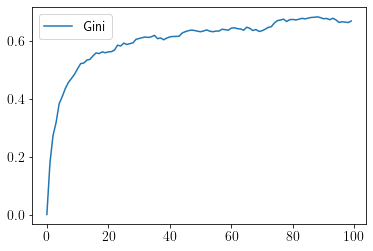

In [8]:
gini = model.datacollector.get_model_vars_dataframe()
gini.plot()

In [9]:
gini.describe()

,Gini
count,100.000000
mean,0.598171
std,0.106165
min,0.000000
25%,0.586726
50%,0.633252
75%,0.662110
max,0.682768


## Batch execution of the simulations

In [4]:
from MoneyGridModel import MoneyGridModel, gini
import mesa.batchrunner as mb

fixed_params = {
        "width": 10,
        "height": 10
        }

variable_params = { "N" : range(10, 500, 10)}

batch_run = mb.BatchRunner(
        MoneyGridModel,
        variable_params,
        fixed_params,
        iterations=5,
        max_steps=100,
        model_reporters={"Gini": gini}
        )

batch_run.run_all()

245it [01:49,  2.24it/s]


In [5]:
run_data = batch_run.get_model_vars_dataframe()
run_data.head()

,N,Run,Gini,width,height
0,10,0,0.70,10,10
1,10,1,0.58,10,10
2,10,2,0.58,10,10
3,10,3,0.62,10,10
4,10,4,0.64,10,10


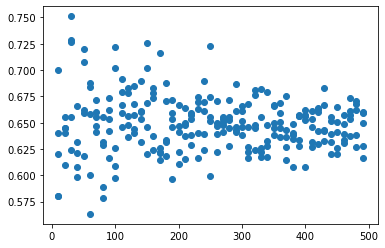

In [6]:
plt.scatter(run_data.N, run_data.Gini)

In [20]:
run_data.to_csv('MoneyGridModel.zip', index=False, compression=dict(method='zip', archive_name='data.csv'))